In [7]:
#Adding libraries required for LSTM

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
#importing the training data

dataset_train= pd.read_csv('Google_Stock_price_Train.csv')
training_set= dataset_train.iloc[:, 1:2].values

In [3]:
#feature scaling (Normalization)

from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range= (0,1))
training_set_scaled= sc.fit_transform(training_set)

In [4]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [5]:
#creating a data structure with 60 timesteps and 1 output

X_train= []
y_train= []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) 


In [6]:
#Reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
#Building RNN

#initializing RNN

regressor= Sequential()


In [9]:
#Adding the first LSTM layer and some dropout regularization to avoid overfitting

regressor.add(LSTM(units= 50, return_sequences= True, input_shape= (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))



In [10]:
#Adding the second LSTM layer and some dropout regularization to avoid overfitting

regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))


In [11]:
#Adding the third LSTM layer and some dropout regularization to avoid overfitting

regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))


In [12]:
#Adding the fourth LSTM layer and some dropout regularization to avoid overfitting

regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))


In [13]:
#Adding output layer

regressor.add(Dense(units= 1))

In [14]:
#Compiling RNN

regressor.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [15]:
#fitting RNN to training set

regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 14s 93ms/step - loss: 0.0459
Epoch 2/100
38/38 [==============================] - 4s 91ms/step - loss: 0.0079
Epoch 3/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0069
Epoch 4/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0059
Epoch 7/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0040
Epoch 13/100
38/38 [=

38/38 [==============================] - 4s 104ms/step - loss: 0.0017
Epoch 100/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0014


In [16]:
#making the predictions and visualizing the results

#getting real stock price of 2017

dataset_test= pd.read_csv('Google_Stock_price_Test.csv')
real_stock_price= dataset_test.iloc[:, 1:2].values

In [18]:
#getting the predicted stock price of 2017

dataset_total= pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs= dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs= inputs.reshape(-1,1)
inputs= sc.transform(inputs)

X_test= []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test= np.array(X_test) 
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price= regressor.predict(X_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

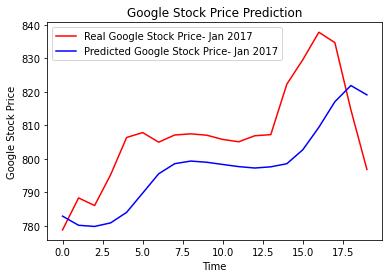

In [19]:
#visualizing the results

plt.plot(real_stock_price, color='red', label='Real Google Stock Price- Jan 2017')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price- Jan 2017')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()